<a href="https://colab.research.google.com/github/Cristian2820/Senales-y-sistemas/blob/main/IntrouccionSyS/Sen%CC%83ales%20De%20Energia%20Y%20De%20Potencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Señales De Energia Y De Potencia

# Ejercicio 1

Graficar la potencia media de una impedancia $R+jwL$, cuándo es excitada por una fuente sinusoidal.

Graficar la potencia media de una impedancia $R-j\frac{1}{wC} $, cuándo es excitada por una fuente sinusoidal.


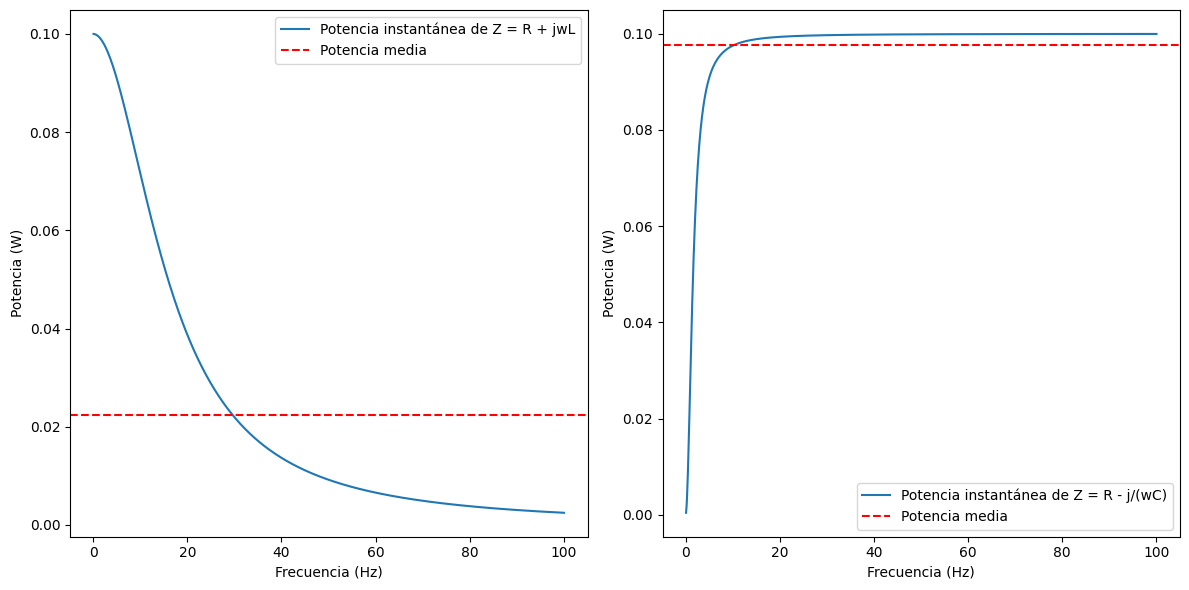

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Valores de los componentes
R = 10  # Resistencia en ohmios
L = 0.1  # Inductancia en henrios
C = 0.01  # Capacitancia en faradios
frequencies = np.linspace(0.1, 100, 1000)  # Rango de frecuencias en Hz
omega = 2 * np.pi * frequencies  # Frecuencia angular en rad/s

# Impedancias
Z1 = R + 1j * omega * L
Z2 = R - 1j / (omega * C)

# Tensión de la fuente sinusoidal
V = 1  # Voltaje de la fuente

# Corriente en el circuito
I1 = V / Z1
I2 = V / Z2

# Potencia instantánea
P1 = np.real(V * np.conj(I1))
P2 = np.real(V * np.conj(I2))

# Potencia media
P_media1 = np.mean(P1)
P_media2 = np.mean(P2)

# Graficar
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(frequencies, P1, label='Potencia instantánea de Z = R + jwL')
plt.axhline(y=P_media1, color='r', linestyle='--', label='Potencia media')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia (W)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(frequencies, P2, label='Potencia instantánea de Z = R - j/(wC)')
plt.axhline(y=P_media2, color='r', linestyle='--', label='Potencia media')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia (W)')
plt.legend()

plt.tight_layout()
plt.show()

# Ejercicio 2




Discuta el concepto de valor RMS de una señal a partir de su potencia media.

El valor medio RMS es un valor importante en el análisis de señales eléctricas, ya que representa la amplitud efectiva de la señal, es decir, la amplitud de una señal que produciría la misma disipación de energía en una carga resistiva que la señal original. Para calcular el valor RMS, se elevan al cuadrado todos los valores de la señal, se promedian y luego se calcula la raíz cuadrada de ese promedio.Matemáticamente, para una señal x(t) en el dominio del tiempo con período T.

# Ejercicio 3

Finalmente, clasifique la señal $x(t) = e^{-\alpha t}~t$ como de energía o de potencia. *Compruebe el resultado solucionando la integral por partes.*

Ayuda: declare la función en la variable **x** en el siguiente bloque de código como se muestra a continuación.

```
x = exp(-a*t)*t
```

In [ ]:
import sympy as sp

# Definimos las variables
t, T = sp.symbols('t T')
# Definimos la señal x(t), por ejemplo, x(t) = sp.sin(t)
x = sp.exp(-a*t)*t

# Calculamos la energía total de la señal
E = sp.integrate(x**2, (t, -sp.oo, sp.oo))
print('La energía total de la señal es:')
sp.pprint(E)
# Calculamos la potencia media de la señal
P = sp.limit(sp.integrate(x**2, (t, -T/2, T/2)) / T, T, sp.oo)
print('\nLa potencia media de la señal es:')
sp.pprint(P)

La energía total de la señal es:
∞

La potencia media de la señal es:
∞


# Ejercicio 4

La distancia entre dos señales $x_1(t)$ y $x_2(t)$ se puede dar en términos de la potencia media de la diferencia entre ellas; es decir, la potencia media del error.

$$
d(x_1, x_2) = \bar{P}_{x_1-x_2}=\lim_{T \to \infty} \frac{1}{T} \int_T |x_1(t)-x_2(t)|^{2}~dt
$$

Sea $x_1(t)$ y $x_2(t$) dos señales periódicas de periodo fundamental $T_0$ como se muestra a continuación.

$$
x_1(t) = \cos(w_0t), ~~~ w_0 = \frac{2\pi}{T_0}\\
x_2(t)= \left\{ \begin{array}{lcc}
             ~~~1 &   si  & 0 \leq t < \frac{T}{4} \\
             \\ -1 &  si &  \frac{T}{4} \leq t < \frac{3T}{4} \\
             \\ ~~~1 &  si  & \frac{3T}{4} \leq t < T
             \end{array}
   \right.
$$

Determine la distancia entre las dos señales.

In [ ]:
import numpy as np
from scipy.integrate import quad

# Parámetros
T0 = 2 * np.pi  # Período fundamental
w0 = 2 * np.pi / T0  # Frecuencia angular

# Definir la función de diferencia al cuadrado
def integrand_1(t):
    return (np.cos(w0 * t) - 1)**2

def integrand_2(t):
    return (np.cos(w0 * t) + 1)**2

# Calcular las integrales
integral_1, _ = quad(integrand_1, 0, T0/4)
integral_2, _ = quad(integrand_2, T0/4, 3*T0/4)
integral_3, _ = quad(integrand_1, 3*T0/4, T0)

# Calcular la distancia
d = (integral_1 + integral_2 + integral_3) / T0

print("La distancia entre las dos señales es:", d)

La distancia entre las dos señales es: 0.22676045526483737


# Ejercicio 5

Demostrar que la norma al cuadrado de una señal equivale a su energía.

Para demostrar que la norma al cuadrado de una señal equivale a su energía, primero definimos la norma al cuadrado de una señal x(t) como:

\begin{aligned}
\|x(t)\|^2 = \int_{-\infty}^{\infty} |x(t)|^2 dt
\end{aligned}

\begin{aligned}
E = \int_{t_1}^{t_2} |x(t)|^2 dt
\end{aligned}

**Demostración:**
\begin{aligned}
\|x(t)\|^2 &= \int_{-\infty}^{\infty} |x(t)|^2 dt \\
&= \lim_{T \to \infty} \int_{-T/2}^{T/2} |x(t)|^2 dt \quad \text{(Por extensión a todo el eje)} \\
&= \lim_{T \to \infty} E_T \quad \text{(Energía en el intervalo de tiempo \( [-T/2, T/2] \))} \\
&= E \quad \text{(Energía total de la señal)}
\end{aligned}